# Project #1

## Step 1 - Understand the Dataset Context

### Step 1.1
The goal of this assignment is to understand the logic and methods of exploratory data analysis (EDA).

1. Prep the data in order to be ready to be fed to a model. Look for missing, null, NaN records.
Find outliers. Transform data – all entries should be numeric.
2. List all types of data, numeric, categorical, text.
3. Perform EDA. Present dependencies and correlations among the various features in the data.
List the most important variables (Feature Importance) that will affect the target label.
4. Split the dataset into training and test datasets (80/20 ratio). Using SweetViz’s ‘compare’
command contrast the training vs test datasets on the target (‘churn’)
5. State limitations/issues (if any) with the given dataset

## Step 2 - Import Libraries and Dataset

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Step 3 - Basic Analyzing

In [6]:
# Read dataset
df_original=pd.read_csv('telco-customer-churn.csv')

In [7]:
# Creating a copy original data
df=df_original.copy()

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
df.shape

(7043, 21)

In [13]:
print(f" Number of Rows = {df.shape[0]} \n Number of Columns = {df.shape[1]}")

 Number of Rows = 7043 
 Number of Columns = 21


In [14]:
# Columns Names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Handling Missing Values

In [15]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [16]:
# # Visualization for missing values
# plt.figure(figsize=(12,8))
# sns.barplot(x=df.isnull().sum().sort_values() , y=df.isnull().sum().sort_values().index)

# # Format

# plt.xlabel("Missing Values Count", fontstyle="italic")
# plt.ylabel("Columns", fontstyle="italic")
# plt.title("Count of Missing Values", fontsize=12, fontstyle='italic')
# plt.show()



From above observation we can conclude that there are no missing value in this dataset


## Step 5 - Finding Outliers

## Step 6 - Numerical and Categorical Columns

In [17]:
numeric_features= [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features= [feature for feature in df.columns if df[feature].dtype=='O']



# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['SeniorCitizen', 'tenure', 'MonthlyCharges']

We have 18 categorical features : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


## Step 7 - Label Encoding


In [18]:
df['Churn']=np.where(df['Churn'].str.contains('No'),0,1)

In [19]:
# Binary

#Check for binaray columns
binary_cols=[ col for col in df.columns if df[col].nunique()==2]
print(f"Binary Columns are {binary_cols}")

# df['Partner'].unique()

Binary Columns are ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


In [20]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [21]:
# Label Enconding
from sklearn.preprocessing import LabelEncoder

Label=LabelEncoder()

for col in binary_cols:
  df[col]=Label.fit_transform(df[col])

print(df[binary_cols].head())


   gender  SeniorCitizen  Partner  Dependents  PhoneService  PaperlessBilling  \
0       0              0        1           0             0                 1   
1       1              0        0           0             1                 0   
2       1              0        0           0             1                 1   
3       1              0        0           0             0                 0   
4       0              0        0           0             1                 1   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1  


In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [23]:
numeric_features= [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features= [feature for feature in df.columns if df[feature].dtype=='O']



# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'Churn']

We have 12 categorical features : ['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'TotalCharges']


In [24]:
trinary_cols=[ col for col in df.columns if df[col].nunique()==3]
print(f"Trinary Columns are {trinary_cols}")


Trinary Columns are ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']


In [25]:
for col in trinary_cols:
  df[col]=Label.fit_transform(df[col])

print(df[trinary_cols].head())

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  
0                 0            0            0                0         0  
1                 2            0            0                0         1  
2                 0            0            0                0         0  
3                 2            2            0                0         1  
4                 0            0            0                0         0  


In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,Electronic check,70.70,151.65,1


In [27]:
bool_features= [feature for feature in df.columns if df[feature].dtype=='bool']


In [28]:
for col in bool_features:
  df[col]=Label.fit_transform(df[col])

print(df[bool_features].head())

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [30]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [31]:
from sklearn.preprocessing import OrdinalEncoder

In [32]:
ordinal=OrdinalEncoder()

In [33]:
df['PaymentMethod']=ordinal.fit_transform(df[['PaymentMethod']])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [35]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2.0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3.0,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3.0,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0.0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2.0,70.70,151.65,1


In [36]:
df['customerID']=Label.fit_transform(df['customerID'])

In [37]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2.0,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3.0,56.95,1889.5,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3.0,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0.0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2.0,70.70,151.65,1


In [38]:
# Replace blank strings with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
mean_total=df['TotalCharges'].mean()

print(mean_total)
df['TotalCharges'] = df['TotalCharges'].fillna(mean_total)

2283.3004408418656


In [39]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [40]:
# Now convert to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [41]:
# sns.pairplot(df)
df.isnull().any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


In [43]:
percentage=df['Churn'].value_counts(normalize=True)*100
percentage

,proportion
Churn,
0,73.463013
1,26.536987


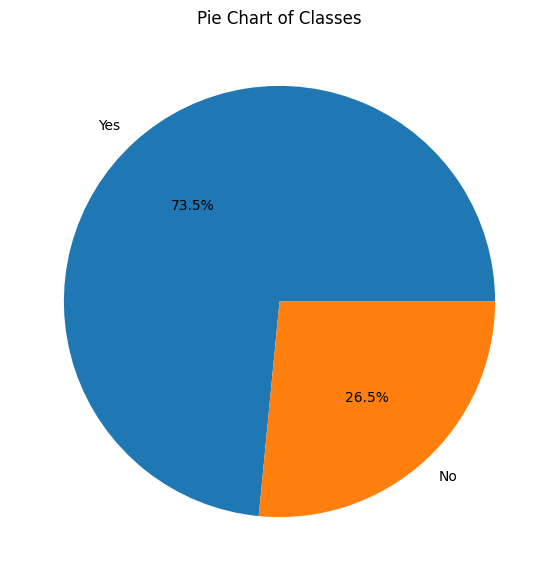

In [44]:
# plotting pie chart
churnLabels=['Yes','No']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=churnLabels,autopct='%1.1f%%') # percentage as a data and label as class categorize
plt.title("Pie Chart of Classes")
plt.show()

In [45]:
# Correlation
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


<Axes: >

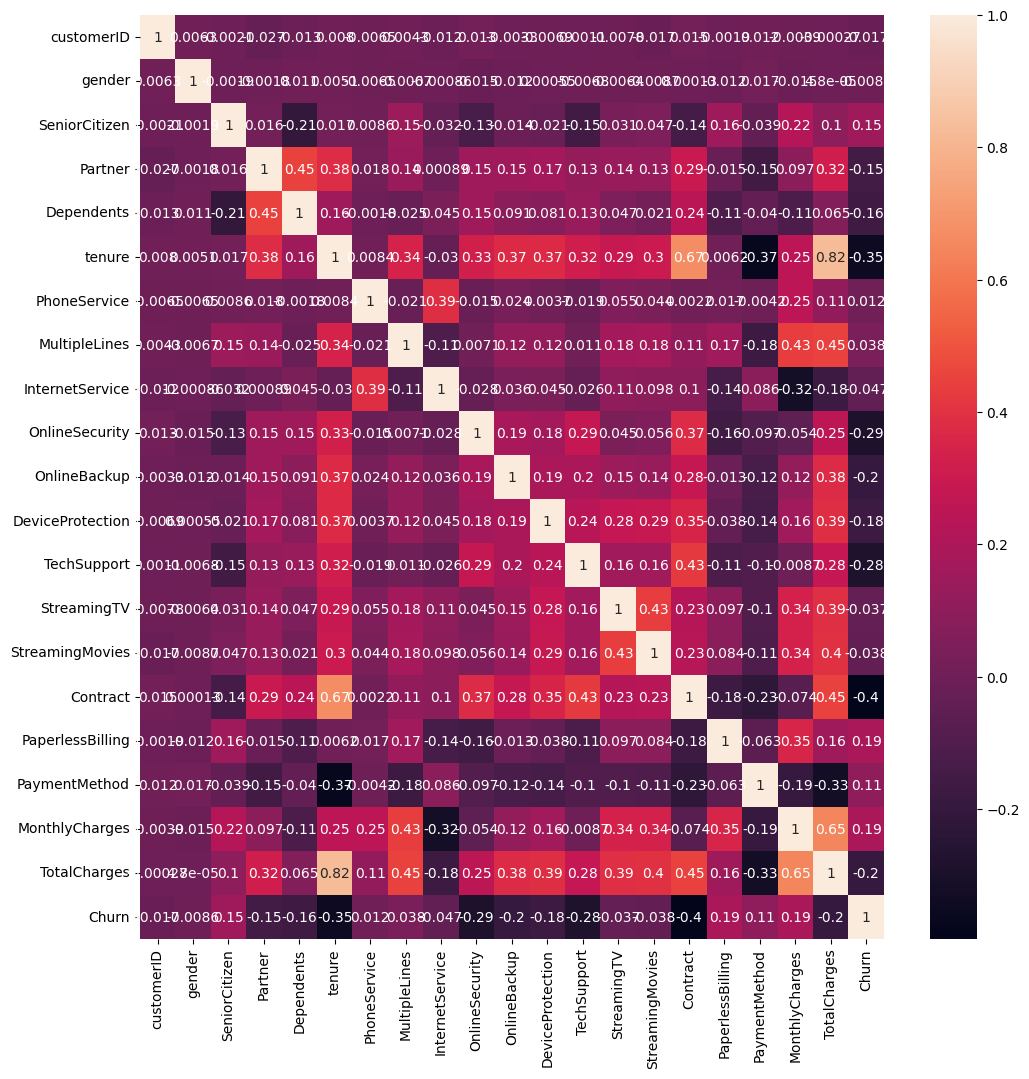

In [79]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

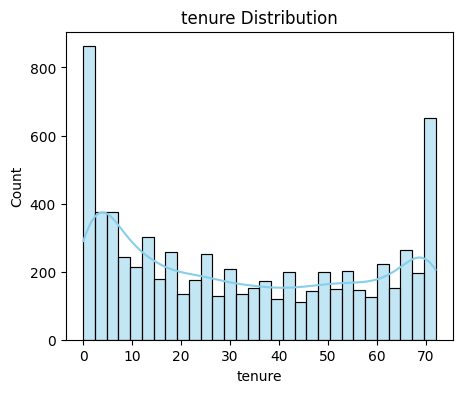

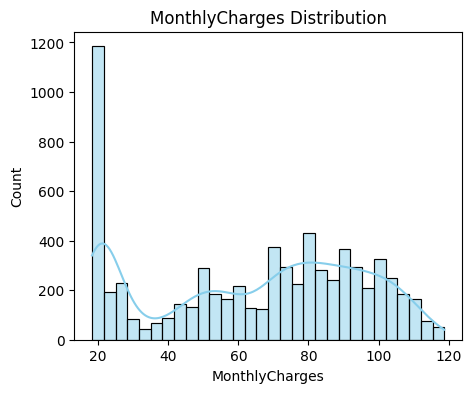

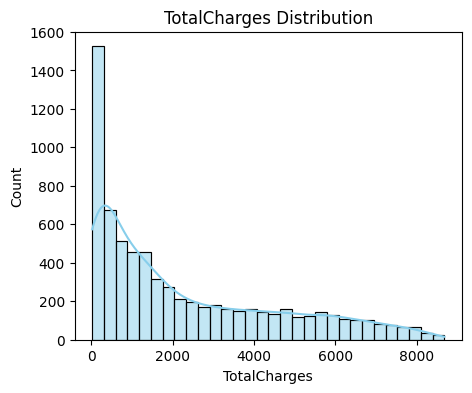

In [47]:
# Numerical Features Distribution
for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    plt.figure(figsize=(5, 4))
    sns.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"{col} Distribution")
    plt.show()

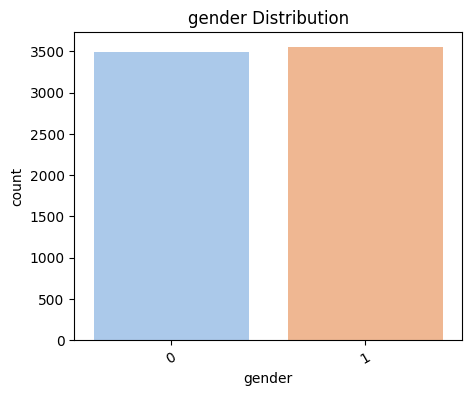

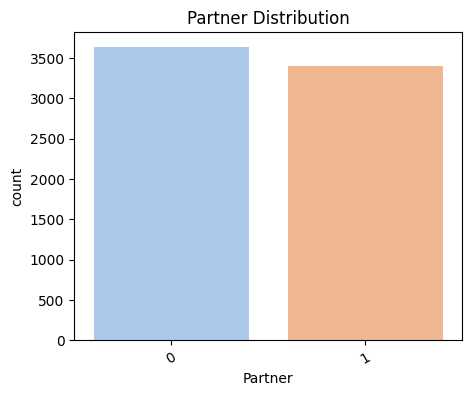

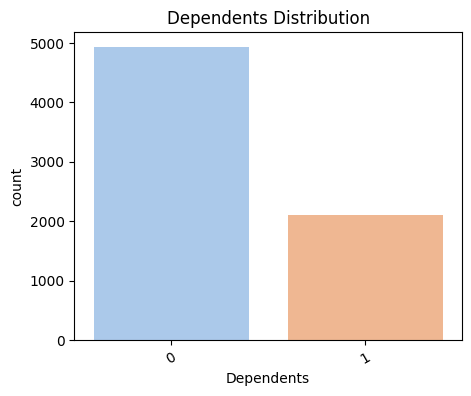

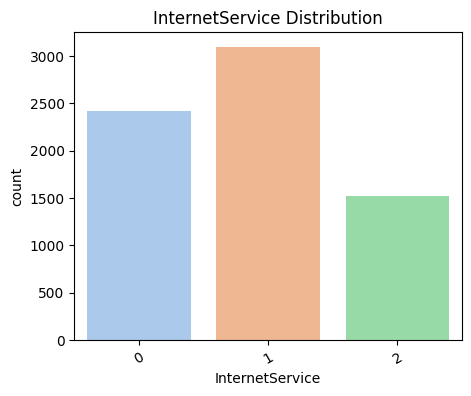

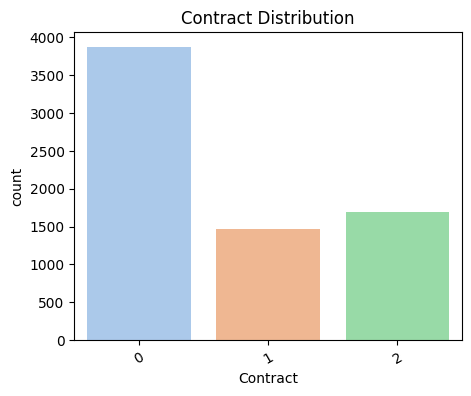

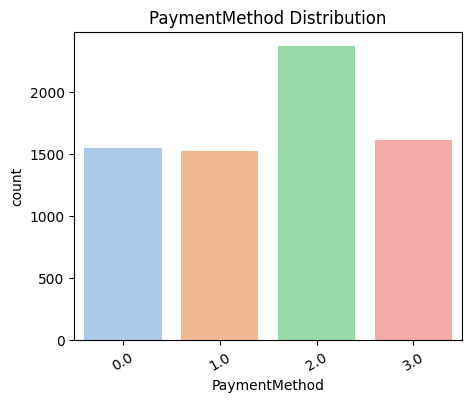

In [48]:
# Categorical Features Distribution
categorical_features = ["gender", "Partner", "Dependents", "InternetService", "Contract", "PaymentMethod"]
for col in categorical_features:
    plt.figure(figsize=(5, 4))
    sns.countplot(data=df, x=col, palette="pastel")
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=30)
    plt.show()

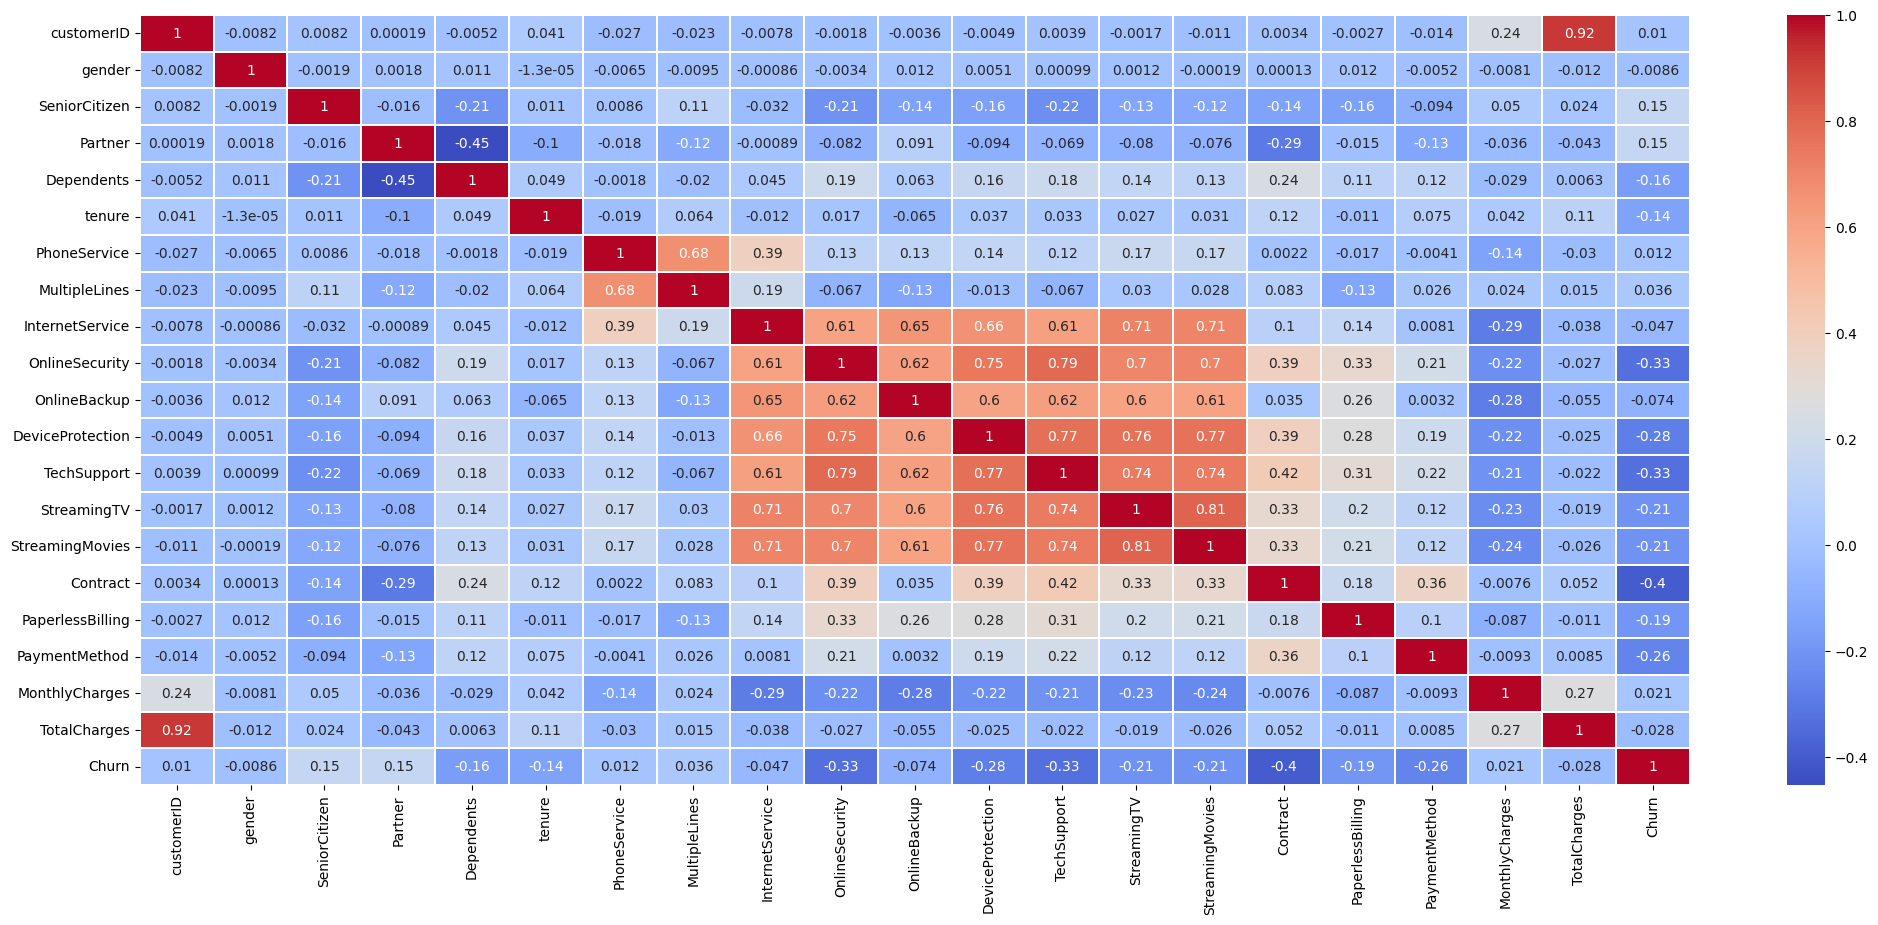

In [49]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm')
plt.show()


In [50]:
# train test split
from sklearn.model_selection import train_test_split

X = df.drop('Churn',axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()

logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)
print(y_pred)

[1 0 0 ... 0 0 1]


In [52]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [53]:
score=accuracy_score(y_pred,y_test)
print("Accuracy Score",score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

Accuracy Score 0.8119233498935415
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1085
           1       0.58      0.67      0.62       324

    accuracy                           0.81      1409
   macro avg       0.74      0.76      0.75      1409
weighted avg       0.82      0.81      0.82      1409

[[928 157]
 [108 216]]


# Observation - Simple Logistic Regression in Imbalance Dataset
- we got Accuracy Score - 0.81


In [54]:
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [55]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [56]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [57]:
## GridSearchCV
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [58]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [59]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [60]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [61]:
grid.best_score_

np.float64(0.7996100872969467)

In [62]:
y_pred=grid.predict(X_test)

In [63]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.8161816891412349
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1095
           1       0.57      0.68      0.62       314

    accuracy                           0.82      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.83      0.82      0.82      1409

[[936 159]
 [100 214]]


## Observation for Grid Search in Imbalance Dataset
- In grid Search hyperparameter tunning the accuracy score increased to - 0.816

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
model=LogisticRegression()
randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,scoring='accuracy')

In [66]:
randomcv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [67]:
randomcv.best_score_

np.float64(0.7996100872969467)

In [68]:
randomcv.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}

In [69]:
y_pred=randomcv.predict(X_test)

In [70]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.8161816891412349
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1095
           1       0.57      0.68      0.62       314

    accuracy                           0.82      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.83      0.82      0.82      1409

[[936 159]
 [100 214]]


## Observation for Grid Search in Imbalance Dataset
- In Ranomised Search hyperparameter tunning the accuracy score increased to - 0.81547

## Logistic regression imbalance data in logistic

In [71]:
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [72]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

## Grid Search

In [73]:
## Hyperparamter tuning
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [74]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [75]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [78]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [80]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 50, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [81]:
y_pred=grid.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score , classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print("Classification Report \n",classification_report(y_pred,y_test))
print("F1 Score : ",f1_score(y_pred,y_test))
print("Precision Score :",precision_score(y_pred,y_test))
print("Recall Score :",recall_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))


0.8147622427253371
Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.85      0.88      1095
           1       0.57      0.68      0.62       314

    accuracy                           0.81      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.83      0.81      0.82      1409

F1 Score :  0.6200873362445415
Precision Score : 0.5710455764075067
Recall Score : 0.678343949044586
[[935 160]
 [101 213]]


## Logistic Regression ROC and AUC curve

In [83]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot

In [84]:
# Creating a dummy dataset.
dummy_model_prob=[0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [85]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [86]:
#
model_prob=model.predict_proba(X_test)
model_prob

array([[0.36194122, 0.63805878],
       [0.94671899, 0.05328101],
       [0.99367128, 0.00632872],
       ...,
       [0.95107043, 0.04892957],
       [0.98838328, 0.01161672],
       [0.48972312, 0.51027688]])

In [87]:
model_prob=model_prob[:,1]

In [88]:
# Let calculate the scores
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)


0.5
0.8569073669609863


In [89]:
# calculate Roc curve
dummy_fpr,dummy_tpr, _ =roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr, thresholds = roc_curve(y_test, model_prob)


In [90]:
thresholds

array([       inf, 0.83363487, 0.82787744, 0.82360975, 0.78049848,
       0.78001116, 0.77087441, 0.77040423, 0.76734455, 0.76602889,
       0.74988912, 0.74868393, 0.74191975, 0.73909074, 0.73784719,
       0.7377804 , 0.73370665, 0.73346793, 0.73116311, 0.7289347 ,
       0.72437189, 0.72377338, 0.72148972, 0.72115892, 0.71579941,
       0.71459607, 0.70339895, 0.70326145, 0.69430319, 0.69378191,
       0.68667273, 0.68367573, 0.67945892, 0.67837113, 0.67705887,
       0.67633953, 0.67420033, 0.6712872 , 0.6712648 , 0.67074941,
       0.66886914, 0.66884636, 0.66638165, 0.66540986, 0.66290843,
       0.66269634, 0.66175615, 0.65835871, 0.6567512 , 0.65605121,
       0.65308296, 0.6511304 , 0.64914664, 0.64902209, 0.64759825,
       0.64733982, 0.64715116, 0.64430782, 0.64416196, 0.64385598,
       0.6403836 , 0.63959841, 0.63805878, 0.63795503, 0.63407844,
       0.63347184, 0.63328956, 0.63147449, 0.63035657, 0.62972297,
       0.62801339, 0.62641971, 0.62628722, 0.6239035 , 0.62345

In [91]:
import seaborn as sns

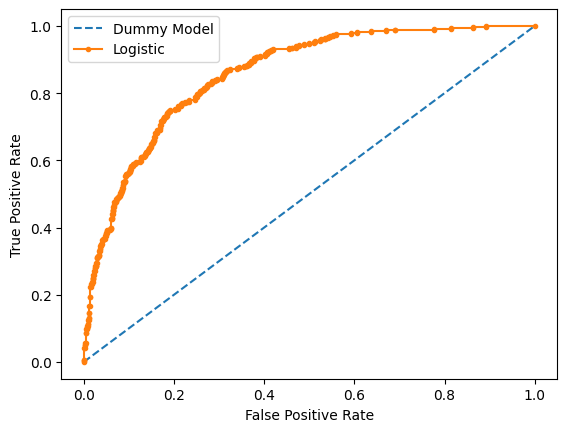

In [92]:
pyplot.plot(dummy_fpr,dummy_tpr,linestyle="--", label ='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker=".",label="Logistic")


pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.legend()
pyplot.show()

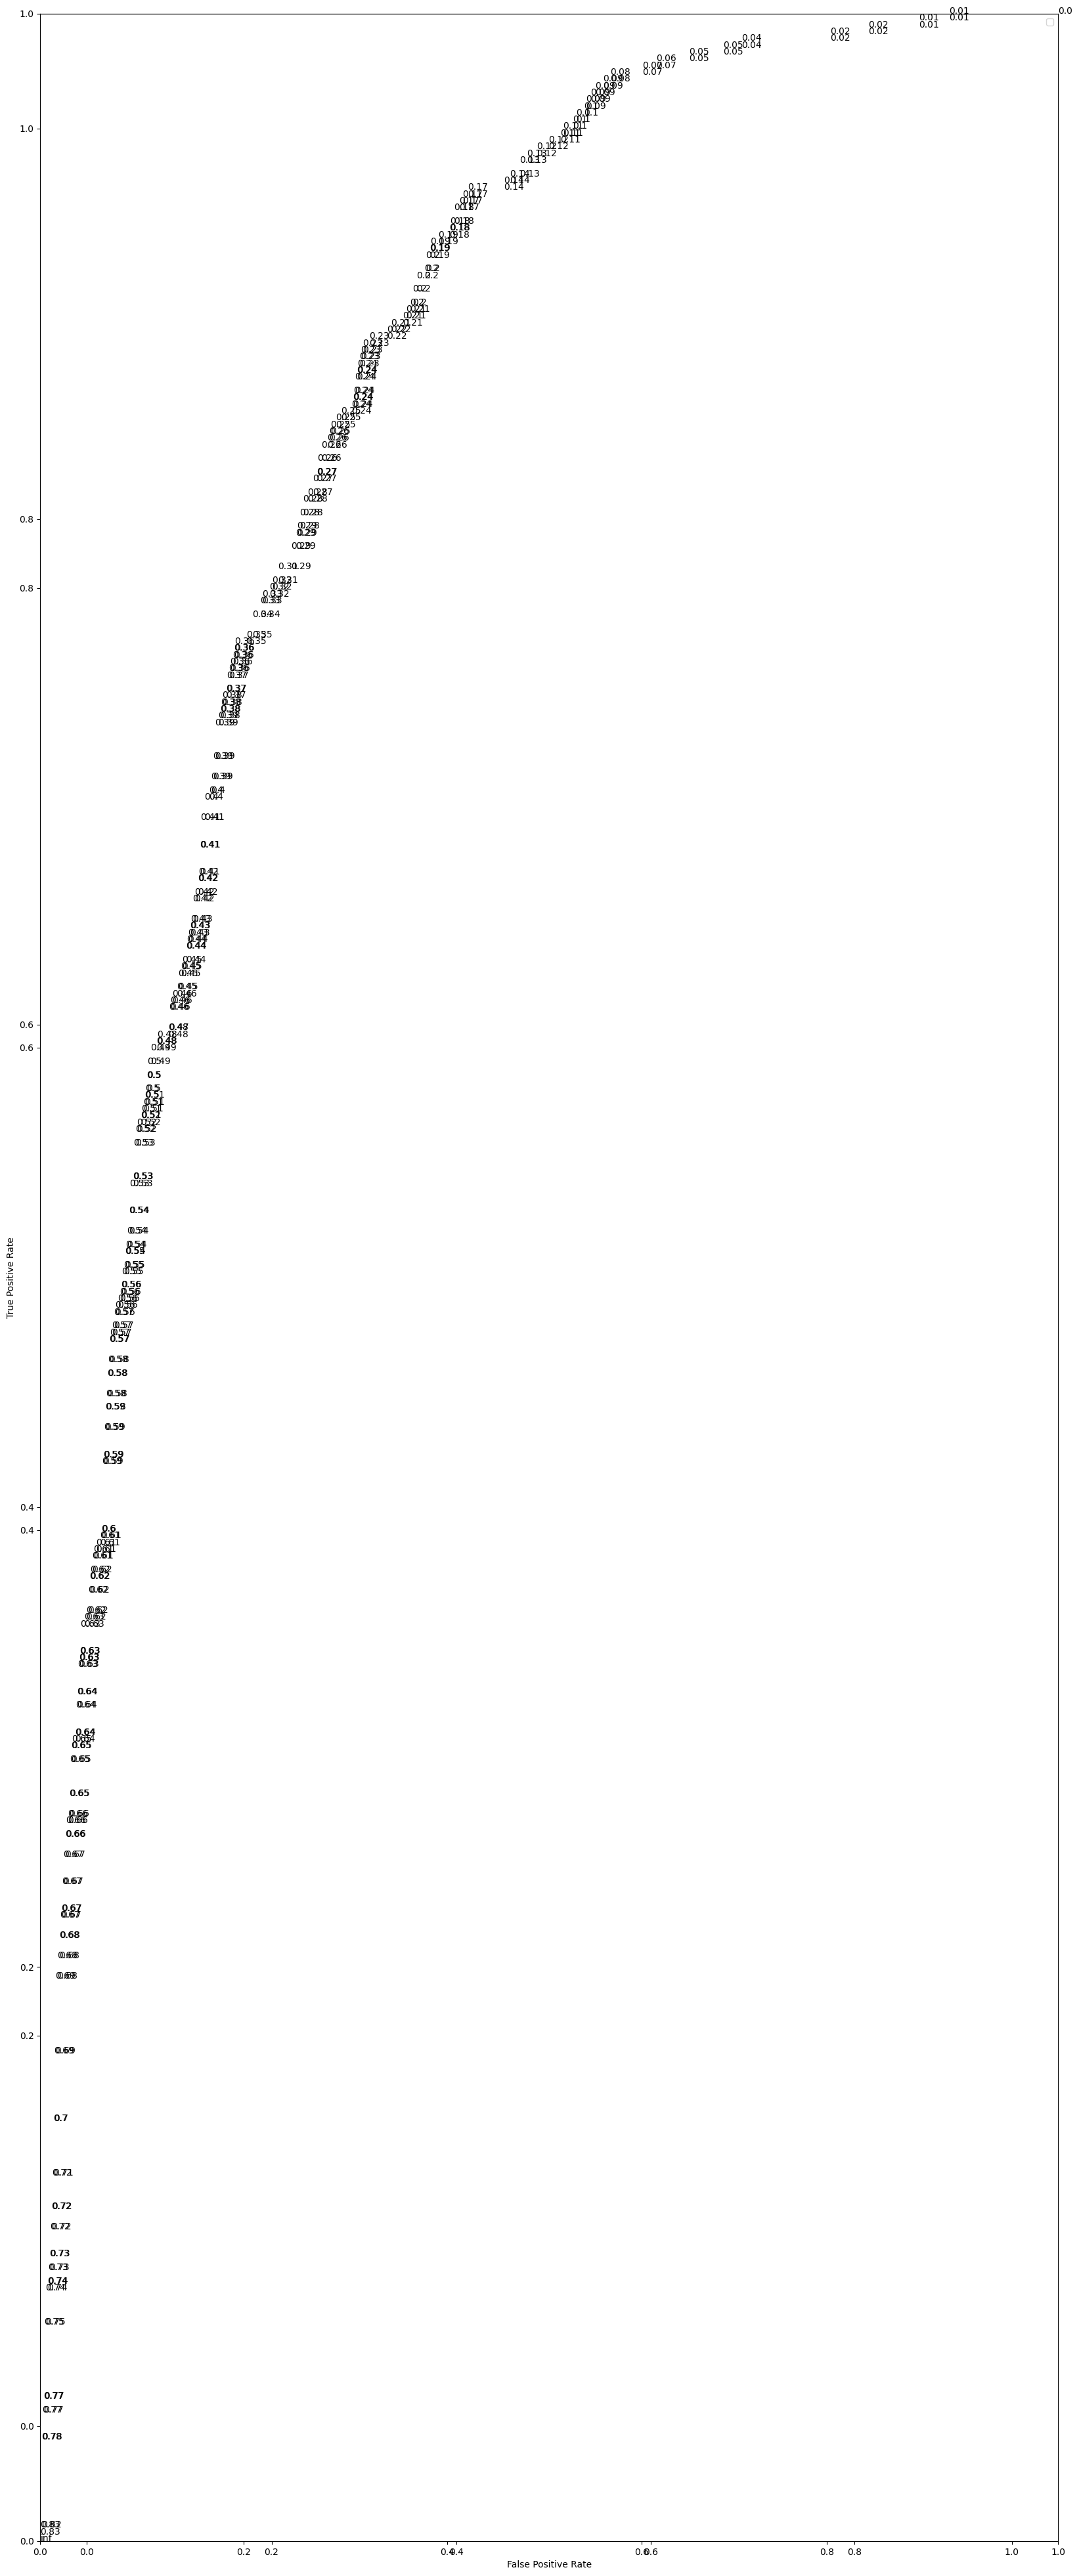

In [93]:
import numpy as np
fig = pyplot.figure(figsize=(20,50))
pyplot.plot(dummy_fpr, dummy_tpr, linestyle= "--", label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker=".", label='Logistic')
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr,thresholds):
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0],xyz[1]))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SMOTE

In [115]:
# Apply SMOTE
X = df.drop('Churn', axis=1)
y = df['Churn']  # ❌ This makes y a DataFrame (2D)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [134]:
y_resampled.shape

(10348,)

In [133]:
y.shape

(7043,)

In [137]:
X_resampled.shape, y_resampled.shape

((10348, 20), (10348,))

In [138]:
from collections import Counter
print("Original target label counts:", Counter(y))
print("Resampled target label counts:", Counter(y_resampled))


Original target label counts: Counter({0: 5174, 1: 1869})
Resampled target label counts: Counter({0: 5174, 1: 5174})


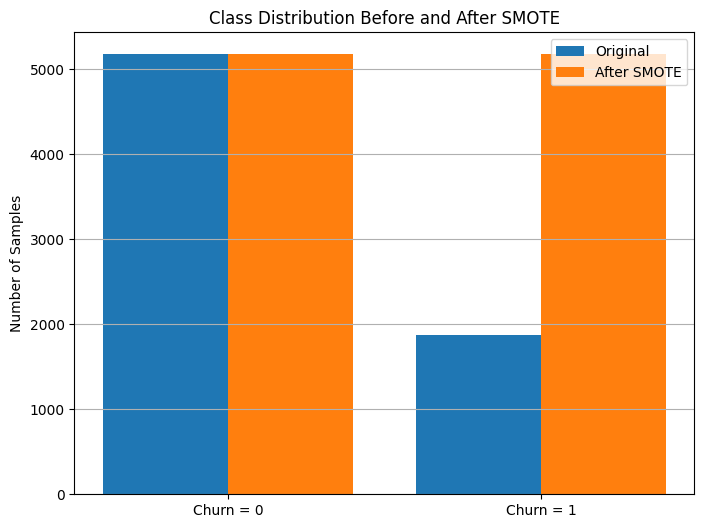

In [118]:
import matplotlib.pyplot as plt

# Count values
original_counts = Counter(y)
resampled_counts = Counter(y_resampled)

# Prepare data
labels = ['Churn = 0', 'Churn = 1']
original_values = [original_counts[0], original_counts[1]]
resampled_values = [resampled_counts[0], resampled_counts[1]]

x = range(len(labels))

# Plot
plt.figure(figsize=(8, 6))
plt.bar(x, original_values, width=0.4, label='Original', align='center')
plt.bar([p + 0.4 for p in x], resampled_values, width=0.4, label='After SMOTE', align='center')

# Format
plt.xticks([p + 0.2 for p in x], labels)
plt.ylabel("Number of Samples")
plt.title("Class Distribution Before and After SMOTE")
plt.legend()
plt.grid(axis='y')
plt.show()


In [139]:
from sklearn.model_selection import train_test_split

X_train_u, y_train_u, X_test_u, y_test_u = train_test_split(X_resampled,y_resampled, test_size=0.25, random_state=42)

In [140]:
y_train_u.shape

(2587, 20)

In [131]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()


logistic.fit(X_train_u,y_train_u)

ValueError: y should be a 1d array, got an array of shape (2587, 20) instead.